<a href="https://colab.research.google.com/github/Sargamtyagi/sentiments_analysis/blob/main/sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn  as sns

In [ ]:
!pip install neattext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.5 MB/s eta 0:00:00


In [ ]:
import neattext.functions as nfx

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("/content/emotion_dataset_2 (1).csv")

In [ ]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [ ]:
df["Emotion"].value_counts()

Emotion
joy         10905
sadness      6642
fear         5350
anger        4245
surprise     4014
neutral      2227
disgust       852
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

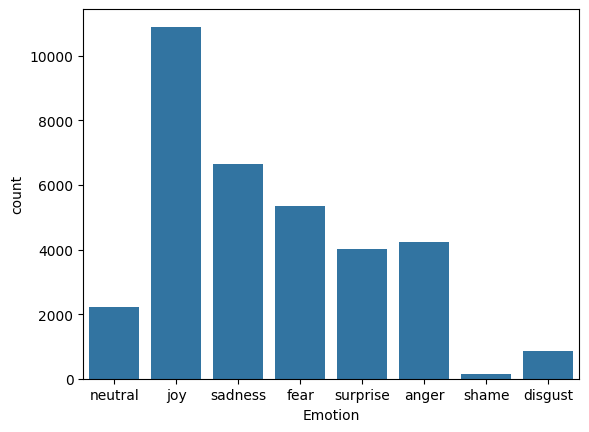

In [ ]:
sns.countplot(x="Emotion",data= df)

In [ ]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
df["Clean_Text"] = df["Text"].apply(nfx.remove_userhandles)

In [ ]:
df["Clean_Text"] = df["Clean_Text"].apply(nfx.remove_stopwords)

In [ ]:
df

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,?
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...,...
34376,34376,fear,@Monsieur_soleil en plus mon mur est visible d...,en plus mon mur est visible de friends friend.
34377,34377,anger,You are not in a position to question my visi...,position question vision statement !
34378,34378,sadness,@MorganLevesque Kikou jeune poney. Est-ce que ...,Kikou jeune poney. Est-ce que tu vois la photo...
34379,34379,sadness,Man I wish I was back in high school. But only...,Man wish high school. miss basketball. #pathetic


In [ ]:
Xfeatures = df["Clean_Text"]
ylabels = df["Emotion"]

In [ ]:
x_train , x_test , y_train,y_test = train_test_split(Xfeatures,ylabels,test_size =0.3,random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe_lr = Pipeline(steps =[("cv",CountVectorizer()),("lr",LogisticRegression())])

In [ ]:
pipe_lr.fit(x_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
pipe_lr.score(x_test,y_test)

0.6194861851672322

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
def calculate_metrics(Xfeatures, ylabels):
  accuracy = accuracy_score(Xfeatures, ylabels )
  f1 = f1_score(Xfeatures, ylabels, average='weighted')  # Adjust 'average' for multi-class
  precision = precision_score(Xfeatures, ylabels, average='weighted')  # Adjust 'average'
  recall = recall_score(Xfeatures, ylabels, average='weighted')  # Adjust 'average'

  return {
      'accuracy': accuracy,
      'f1-score': f1,
      'precision': precision,
      'recall': recall
  }

In [ ]:
metrics = calculate_metrics(Xfeatures, ylabels)
print(metrics)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.0, 'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
ex1 = "This book was so interesting it made me happy"

In [ ]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [ ]:
pipe_lr.predict_proba([ex1])

array([[1.45409765e-03, 6.53162855e-03, 5.78822301e-03, 8.89168363e-01,
        6.17188709e-05, 1.01545510e-02, 6.68356685e-05, 8.67745822e-02]])

In [ ]:
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [ ]:
import joblib
joblib.dump(pipe_lr,"pipeline_file")


['pipeline_file']